In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from pathlib import Path
import unicodedata, re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [21]:
ROOT_DIR = Path( "/Users/victus/Downloads/archive")  

def clean_nepali(text):
    text = unicodedata.normalize("NFC", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

rows = []

for class_dir in ROOT_DIR.iterdir():
    if not class_dir.is_dir():
        continue

    label = class_dir.name   

    for file in class_dir.rglob("*.txt"):
        try:
            text = file.read_text(encoding="utf-8")
        except UnicodeDecodeError:
            text = file.read_text(encoding="utf-8", errors="ignore")

        text = clean_nepali(text)

        if text:
            rows.append({
                "text": text,
                "label": label
            })

df = pd.DataFrame(rows)

print(df.head())
print(df["label"].value_counts())

                                                text         label
0  घर जग्गा कारोबारमा आत्मविश्वास गुमेको वर्ष"बैं...  ArthaBanijya
1  सहायताको प्राथमिकता तोक्न आयोजना बैंकप्राथमिकत...  ArthaBanijya
2  व्यापारीको बेइमानीले सर्वसाधारणलाई सास्तीपेट्र...  ArthaBanijya
3  मोबाइल सेट आयातमा टाइप एप्रुभल लागूसरकारले मोब...  ArthaBanijya
4  रारामा रिसोर्ट र पर्यटक सेवा केन्द्र बन्नेदेशक...  ArthaBanijya
label
ArthaBanijya       1000
Bichar             1000
Desh               1000
Khelkud            1000
Manoranjan         1000
Prabas             1000
Sahitya            1000
SuchanaPrabidhi    1000
Swasthya           1000
Viswa              1000
Name: count, dtype: int64


In [22]:
df.shape

(10000, 2)

In [23]:
df.head(5)

,text,label
0,"घर जग्गा कारोबारमा आत्मविश्वास गुमेको वर्ष""बैं...",ArthaBanijya
1,सहायताको प्राथमिकता तोक्न आयोजना बैंकप्राथमिकत...,ArthaBanijya
2,व्यापारीको बेइमानीले सर्वसाधारणलाई सास्तीपेट्र...,ArthaBanijya
3,मोबाइल सेट आयातमा टाइप एप्रुभल लागूसरकारले मोब...,ArthaBanijya
4,रारामा रिसोर्ट र पर्यटक सेवा केन्द्र बन्नेदेशक...,ArthaBanijya


In [24]:
X=df["text"]
y=df["label"]

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [26]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [27]:
pipe = make_pipeline(
    TfidfVectorizer(ngram_range=(1,2), min_df=3, max_features=100000),
    LogisticRegression(max_iter=1000) # Added max_iter for convergence
)

pipe.fit(X_train, y_train_enc)
y_preds = pipe.predict(X_test)
print(f'Accuracy={accuracy_score(y_test_enc,y_preds)*100:.3f}')
print(f'Classification Report\n{classification_report(y_test_enc,y_preds)}')

Accuracy=84.850
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       183
           1       0.89      0.93      0.91       207
           2       0.82      0.86      0.84       214
           3       0.99      0.98      0.99       193
           4       0.73      0.73      0.73       192
           5       0.87      0.75      0.80       220
           6       0.73      0.75      0.74       193
           7       0.92      0.84      0.88       196
           8       0.91      0.92      0.91       203
           9       0.83      0.89      0.86       199

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



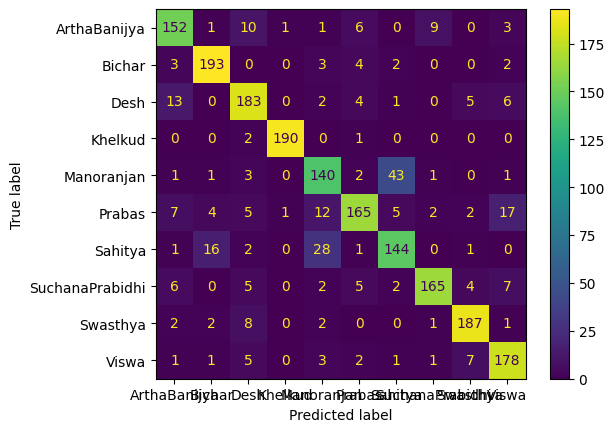

In [28]:
#find average model accuracy
cm=confusion_matrix(y_test_enc,y_preds)
cm_plot=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
cm_plot.plot()
plt.savefig('cm.png')
plt.show()

In [29]:
#export the model using joblib
import joblib
joblib.dump(pipe, 'nepali_news_classifier.joblib')
joblib.dump(le, 'nepali_news_label_encoder.joblib')

['nepali_news_label_encoder.joblib']